### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
import statsmodels.api as sm

### Read Excel file (.xlsx)

In [2]:
data = pd.read_excel('1645792390_cep1_dataset.xlsx')

In [3]:
data.head(305)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Show shape of data and info

In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Look for missing values

In [6]:
print("Null values in each column: ")
print(data.isnull().sum(),"\n")

print("Total number of null values: ")
print(data.isnull().sum().sum())

Null values in each column: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64 

Total number of null values: 
0


### Check for duplicates

In [7]:
print("Total number of duplicates: ")
print(data.duplicated().sum())

Total number of duplicates: 
1


### Drop duplicates

In [8]:
data.drop_duplicates(subset=None, keep="first", inplace=True)

print("Total number of duplicates after dropping: ")
print(data.duplicated().sum())

Total number of duplicates after dropping: 
0


### Show stats of data with .describe()

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Identify categorical variables

In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
categorical_columns = data.iloc[:, 0:14]

print("Categorical Variables: ")
print(categorical_columns)

Categorical Variables: 
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1

### Study the occurrence of CVD across the Age category

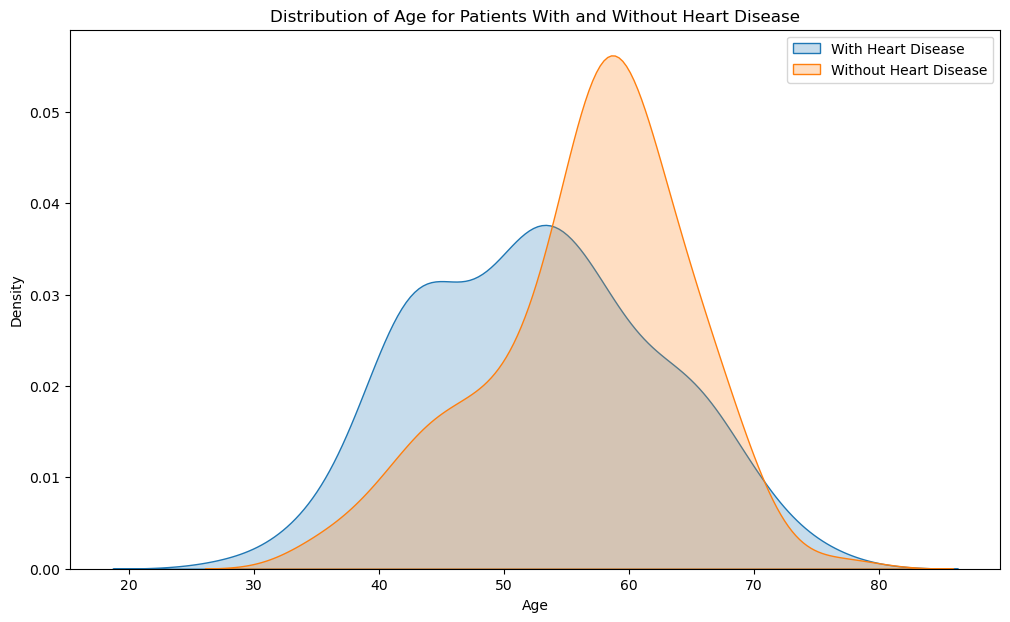

In [12]:
plt.figure(figsize=(12, 7))
sns.kdeplot(data[data['target'] == 1]['age'], label='With Heart Disease', fill=True)
sns.kdeplot(data[data['target'] == 0]['age'], label='Without Heart Disease', fill=True)
plt.title('Distribution of Age for Patients With and Without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Study the composition of all patients with respect to the Sex category

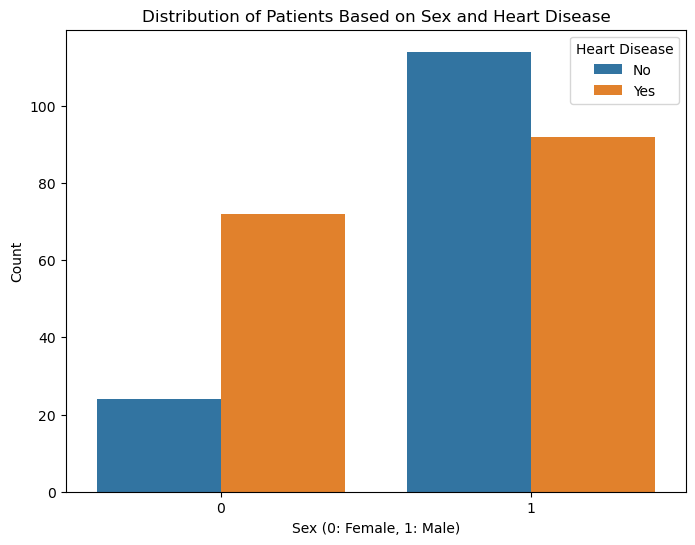

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title('Distribution of Patients Based on Sex and Heart Disease')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

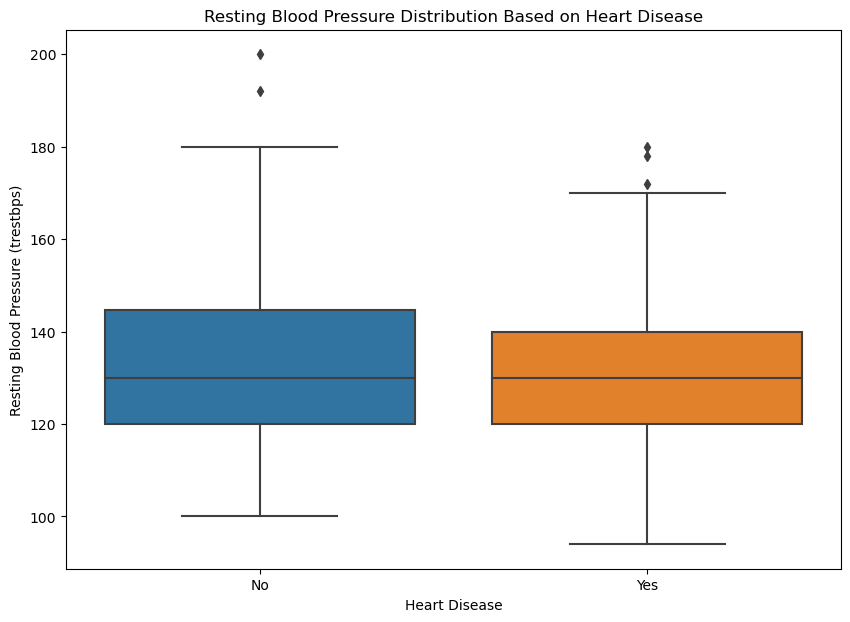

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='trestbps', data=data)
plt.title('Resting Blood Pressure Distribution Based on Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### Describe the relationship between cholesterol levels and a target variable

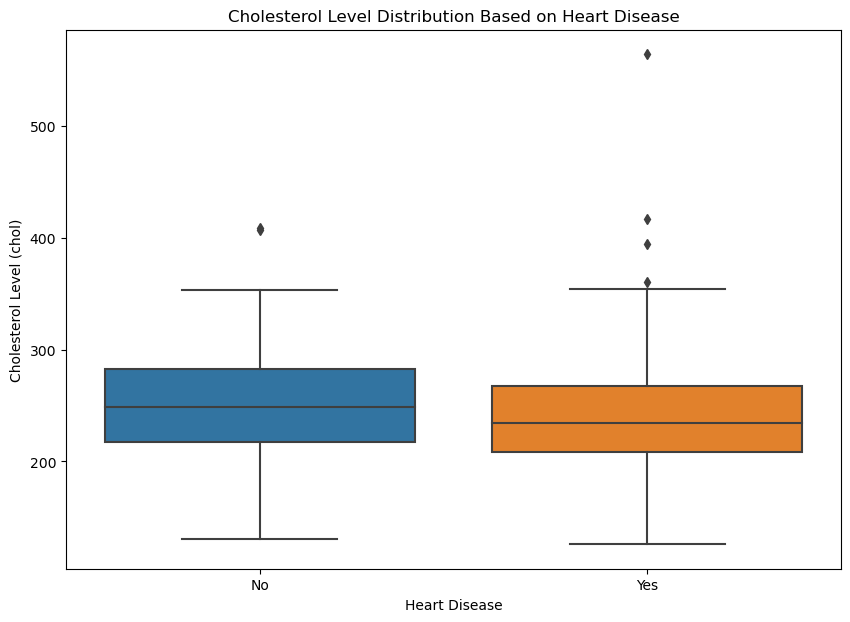

In [15]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='chol', data=data)
plt.title('Cholesterol Level Distribution Based on Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level (chol)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### Relationship between Peak Exercising and the Occurrence of a Heart Attack

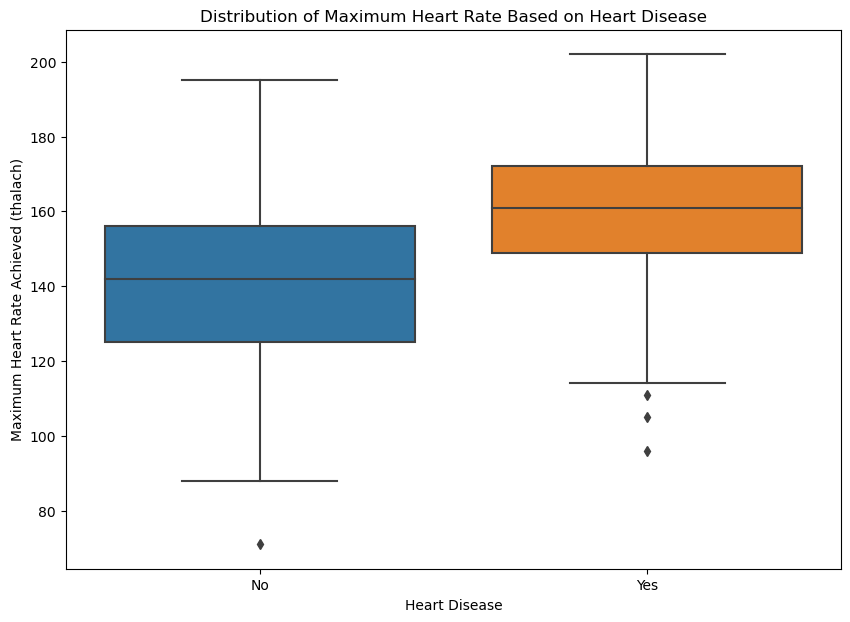

In [16]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Distribution of Maximum Heart Rate Based on Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

### Check if Thalassemia is a Major Cause of CVD

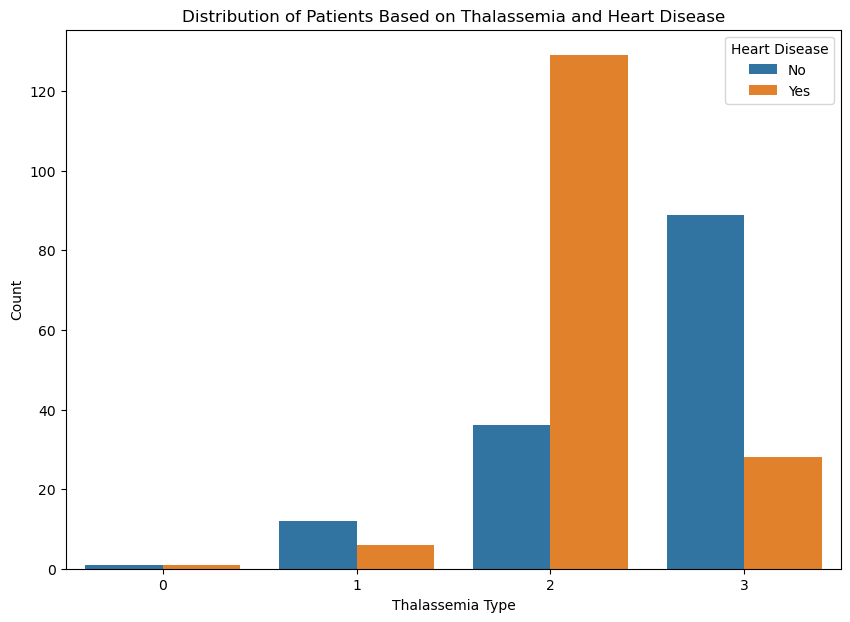

In [17]:
plt.figure(figsize=(10, 7))
sns.countplot(x='thal', hue='target', data=data)
plt.title('Distribution of Patients Based on Thalassemia and Heart Disease')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### List how the other factors determine the occurrence of CVD using a correlation matrix

In [18]:
correlation_matrix = data.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


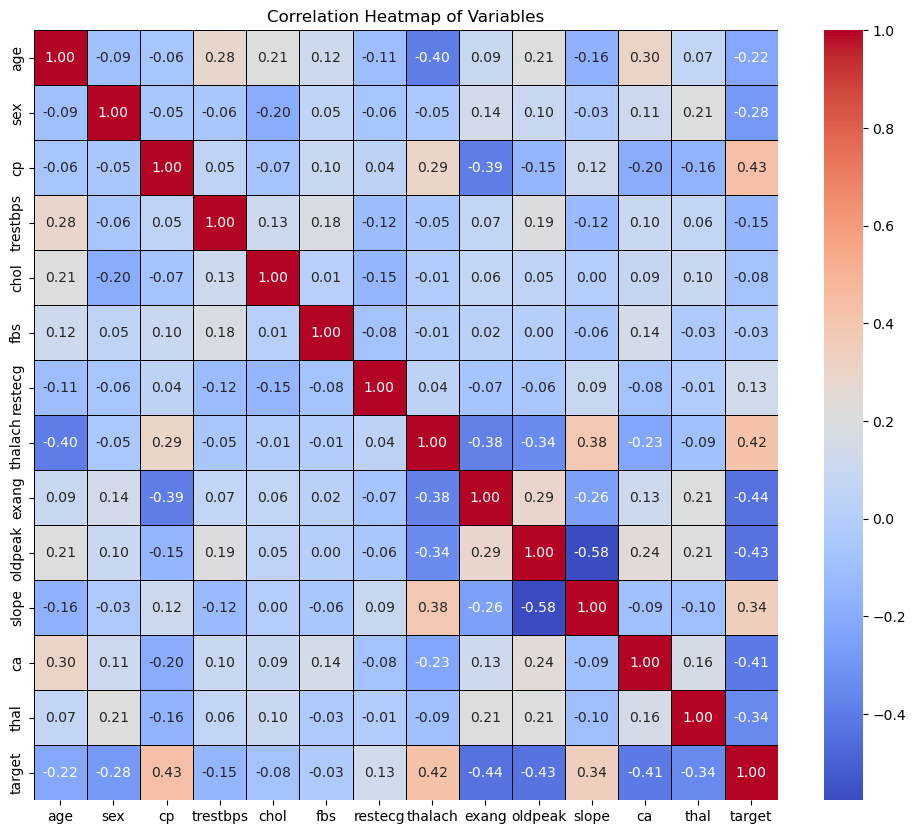

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

### Use a pair plot to understand the relationship between all the given variables

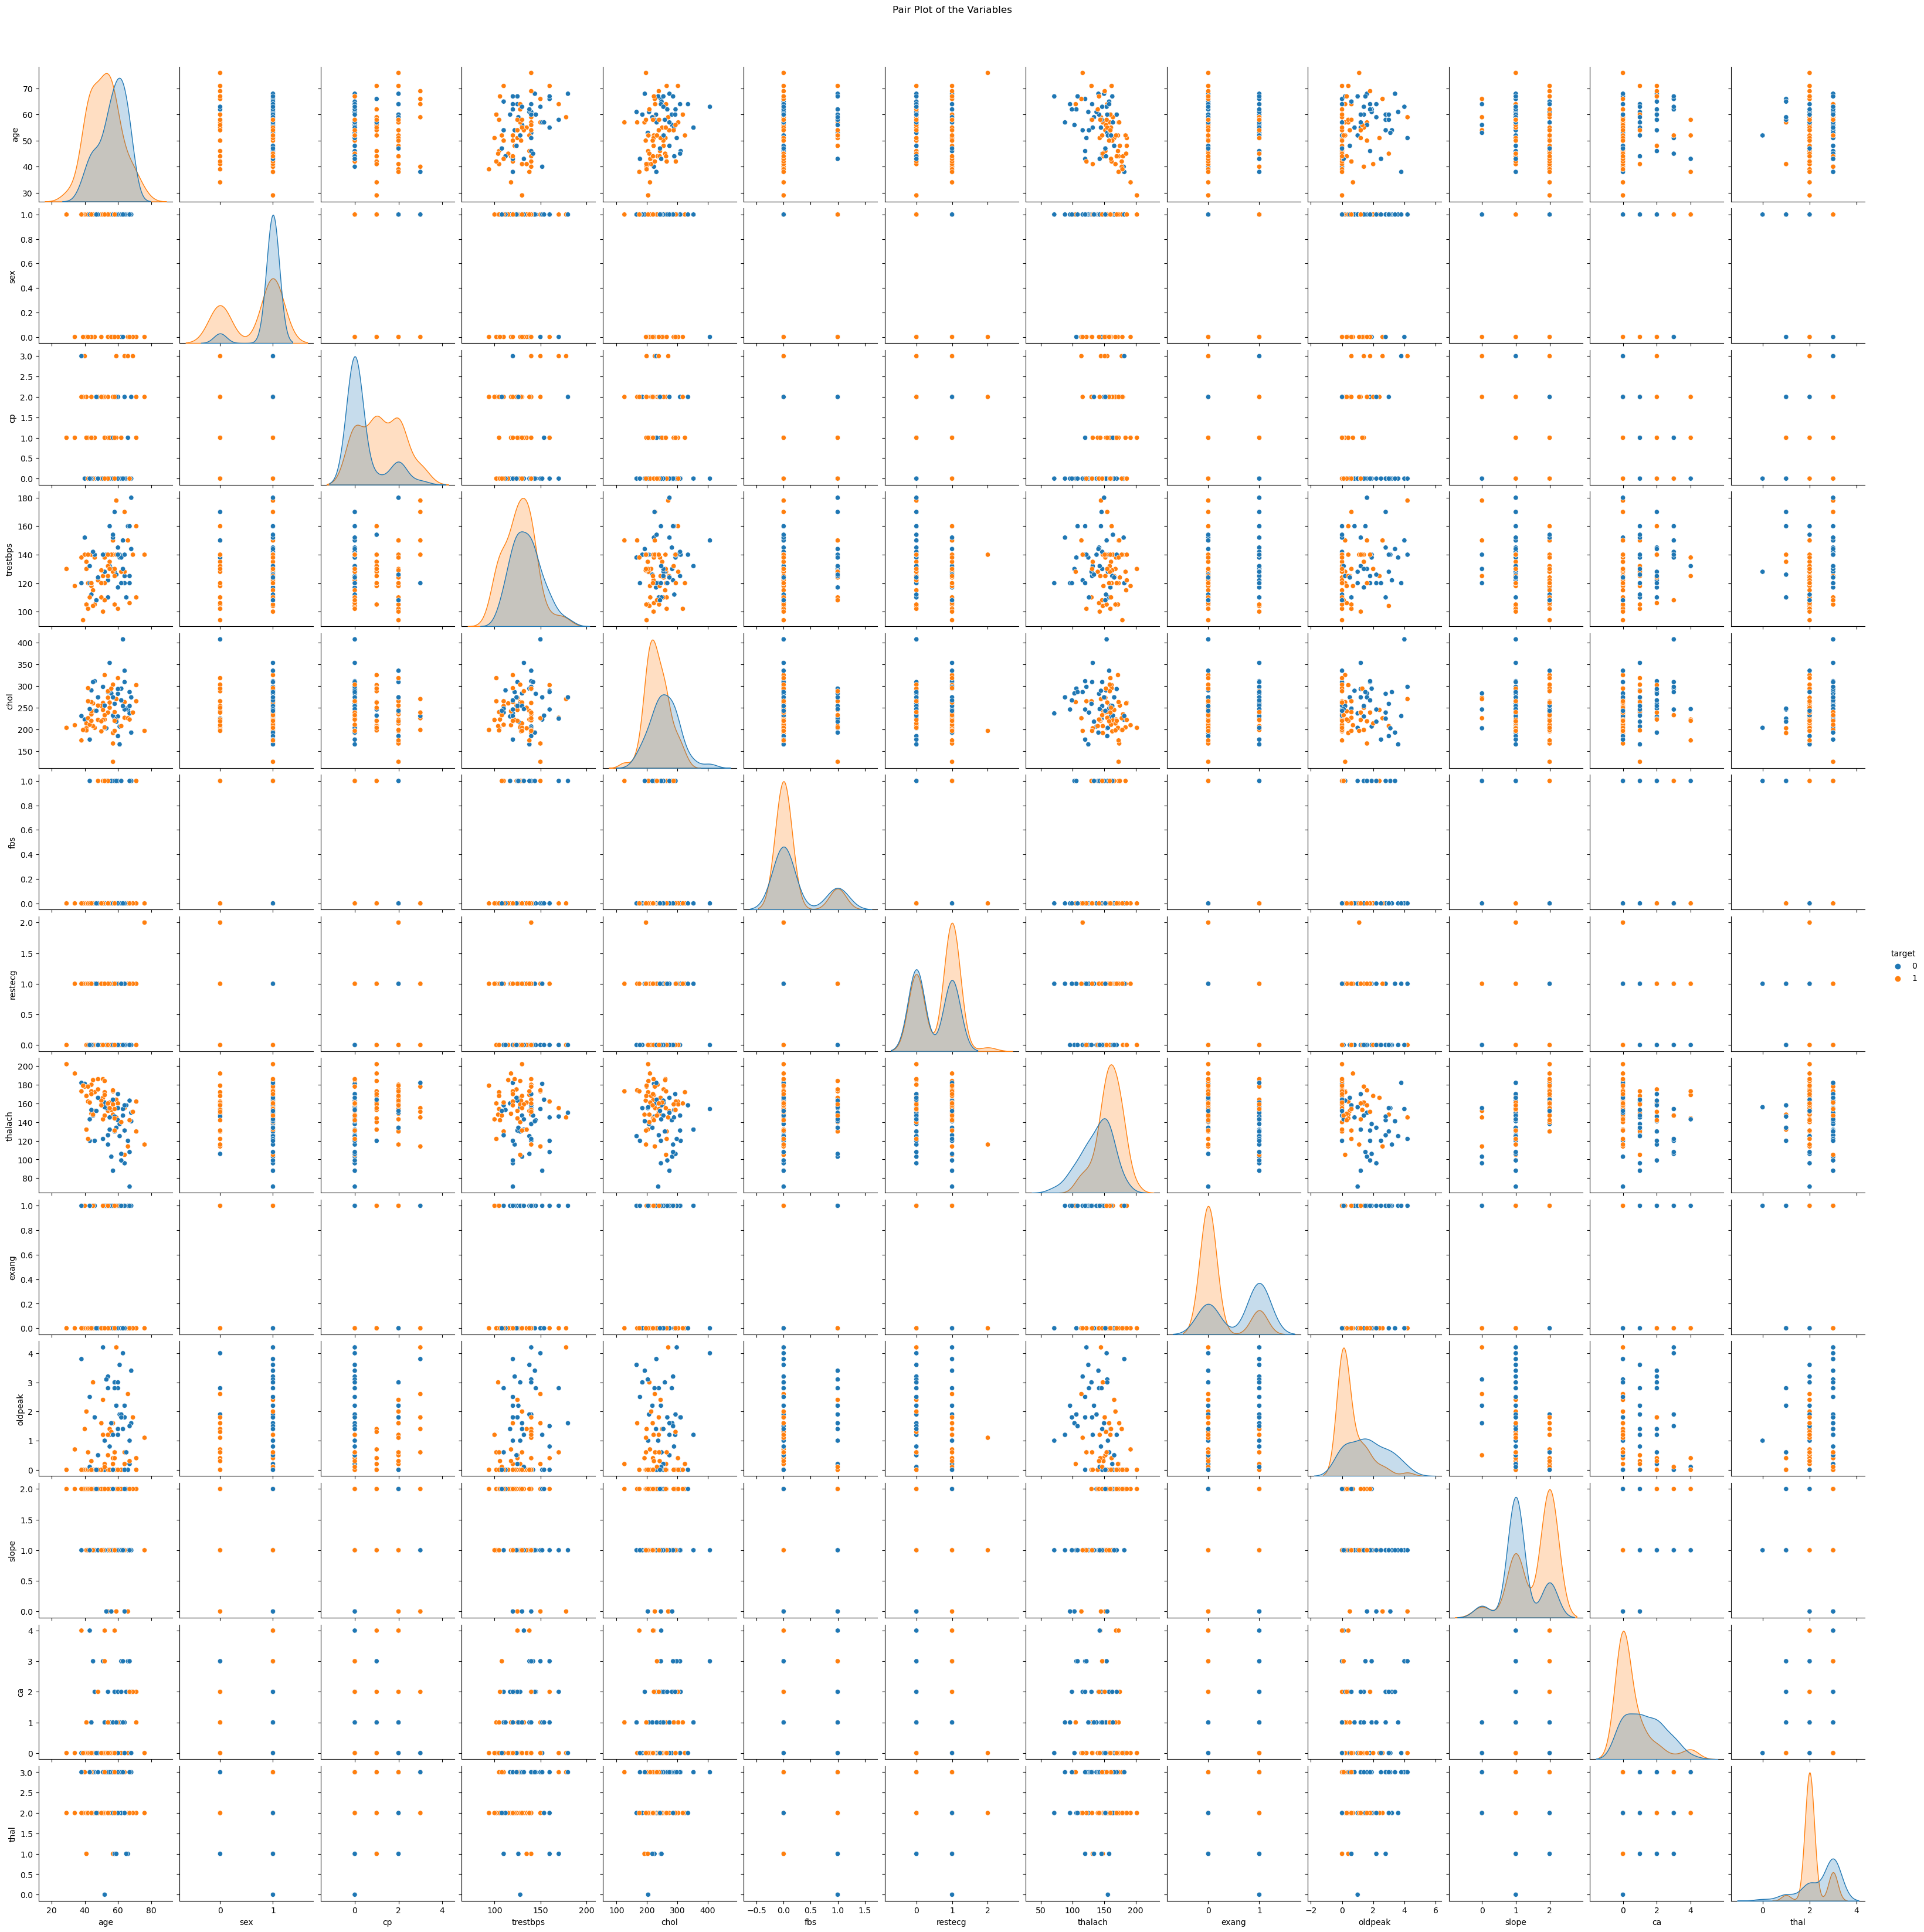

In [20]:
sns.pairplot(data.sample(100, random_state=42), hue='target', diag_kind='kde')
plt.suptitle("Pair Plot of the Variables", y=1.02)
plt.show()

### Baseline Logistic Regression & Random Forest Model

In [21]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_predictions = log_reg.predict(X_test_scaled)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

log_reg_f1 = f1_score(y_test, log_reg_predictions)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

rf_f1 = f1_score(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Baseline Logistic Regression:")
print(f"F1 Score: {log_reg_f1:.4f}")
print(f"Accuracy: {log_reg_accuracy:.4f}\n")

print("Random Forest:")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}")

Baseline Logistic Regression:
F1 Score: 0.8387
Accuracy: 0.8361

Random Forest:
F1 Score: 0.8710
Accuracy: 0.8689


### Improved Logistic Regression leveraging statsmodels

In [22]:
X_with_const = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit()

refined_features = ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
X_train_refined = X_train[refined_features]
X_test_refined = X_test[refined_features]
X_train_refined_scaled = scaler.fit_transform(X_train_refined)
X_test_refined_scaled = scaler.transform(X_test_refined)

log_reg_refined = LogisticRegression(random_state=42)
log_reg_refined.fit(X_train_refined_scaled, y_train)
log_reg_refined_predictions = log_reg_refined.predict(X_test_refined_scaled)

log_reg_refined_f1 = f1_score(y_test, log_reg_refined_predictions)
log_reg_refined_accuracy = accuracy_score(y_test, log_reg_refined_predictions)

Optimization terminated successfully.
         Current function value: 0.347733
         Iterations 7


In [23]:
print("Improved Logistic Regression (using refined features):")
print(f"F1 Score: {log_reg_refined_f1:.4f}")
print(f"Accuracy: {log_reg_refined_accuracy:.4f}")

Improved Logistic Regression (using refined features):
F1 Score: 0.8615
Accuracy: 0.8525


### Compare models

In [24]:
print("Baseline Logistic Regression:")
print(f"F1 Score: {log_reg_f1:.4f}")
print(f"Accuracy: {log_reg_accuracy:.4f}\n")

print("Random Forest:")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Accuracy: {rf_accuracy:.4f}\n")

print("Improved Logistic Regression (using refined features):")
print(f"F1 Score: {log_reg_refined_f1:.4f}")
print(f"Accuracy: {log_reg_refined_accuracy:.4f}")

Baseline Logistic Regression:
F1 Score: 0.8387
Accuracy: 0.8361

Random Forest:
F1 Score: 0.8710
Accuracy: 0.8689

Improved Logistic Regression (using refined features):
F1 Score: 0.8615
Accuracy: 0.8525
